# ID 5059 Coursework 1
John Belcher-Heath (jbh6)

# Introduction

The task is to predict the price of a car from a subset of attributes from the Kaggle dataset.

I will complete the task following the ML checklist in the book, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. which is:

1. Frame the problem
2. Get the data
3. Explore the data
4. Prepare the data
5. Explore models
6. Fine-tune models
7. Present solution
8. Launch/maintain

1 has already been done; we want to predict price of a car using attributes available to us.

# 2. Get the data

In the section the data will be obtained and read into a pandas.dataframe to explore. Note one the medium datasets will be explored since all we are doing is getting to know the data. So one of the medium files can be assumed to give a relatively good representation of the overall dataset, whilst minimising the amount of data requiring to be manipulated.

In [2]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn | grep -v 'already satisfied'

# Import libraries
import pandas as pd
import numpy as np
import sklearn
import os
import glob
from pathlib import Path

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 55.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Not uninstalling numpy at /usr/lib64/python3.9/site-packages, outside environment /home/jbh6/Documents/git/ID5059_co

In [20]:
folder_path: str = "/cs/studres/ID5059/Coursework/Coursework-1/data/2_medium" # uni
# folder_path : str = r"/home/johnbh/personal_git/ID5059_coursework_1/used_cars_data_small" # Desktop

if not os.path.exists(folder_path):
    raise FileNotFoundError
os.chdir(folder_path)

file_names : list = [i for i in glob.glob("*.{}".format('csv'))]

def read_car_data(filepath : str) -> pd.DataFrame:
    """
    Reads a filepath and returns the dataframe
    :param filepath: The location of the file to read
    :return: returns the pandas dataframe
    """
    return pd.read_csv(filepath, index_col = "vin")

df = read_car_data(file_names[0]) # Read one of the medium files
data_original_length : int = len(df.index)

In [21]:
# os.chdir(folder_path)
# file_names : list = [i for i in glob.glob("*.{}".format('csv'))]
# df = pd.concat(map(read_car_data, file_names))


# 3. Explore the data

The data will now be inspected to explore what attributes are available to use. Additionally, with this output, attributes with large proportion of NAs can be identified and removed.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31231 entries, 1GCNKREC8GZ291263 to 3C6UR5HL7LG197579
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   back_legroom             29829 non-null  object 
 1   bed                      234 non-null    object 
 2   bed_height               4700 non-null   object 
 3   bed_length               4700 non-null   object 
 4   body_type                31122 non-null  object 
 5   cabin                    861 non-null    object 
 6   city                     31231 non-null  object 
 7   city_fuel_economy        25621 non-null  float64
 8   combine_fuel_economy     0 non-null      float64
 9   daysonmarket             31231 non-null  int64  
 10  dealer_zip               31231 non-null  int64  
 11  description              30002 non-null  object 
 12  engine_cylinders         30297 non-null  object 
 13  engine_displacement      29730 non-null  float64
 14 

Let's explore all the numerical attributes with an actual numerical meaning.(index or listing_id have no meaning numerically).

Firstly though, let's drop all attributes from above which have less than 20% non-null values, since including these may negatively effect our model if a majority of entries do not have this attribute.

In [25]:
# Drop all attributes with less than 10% non-null values
df = df.drop(columns=df.keys()[df.count() / len(df.index) < 0.2])

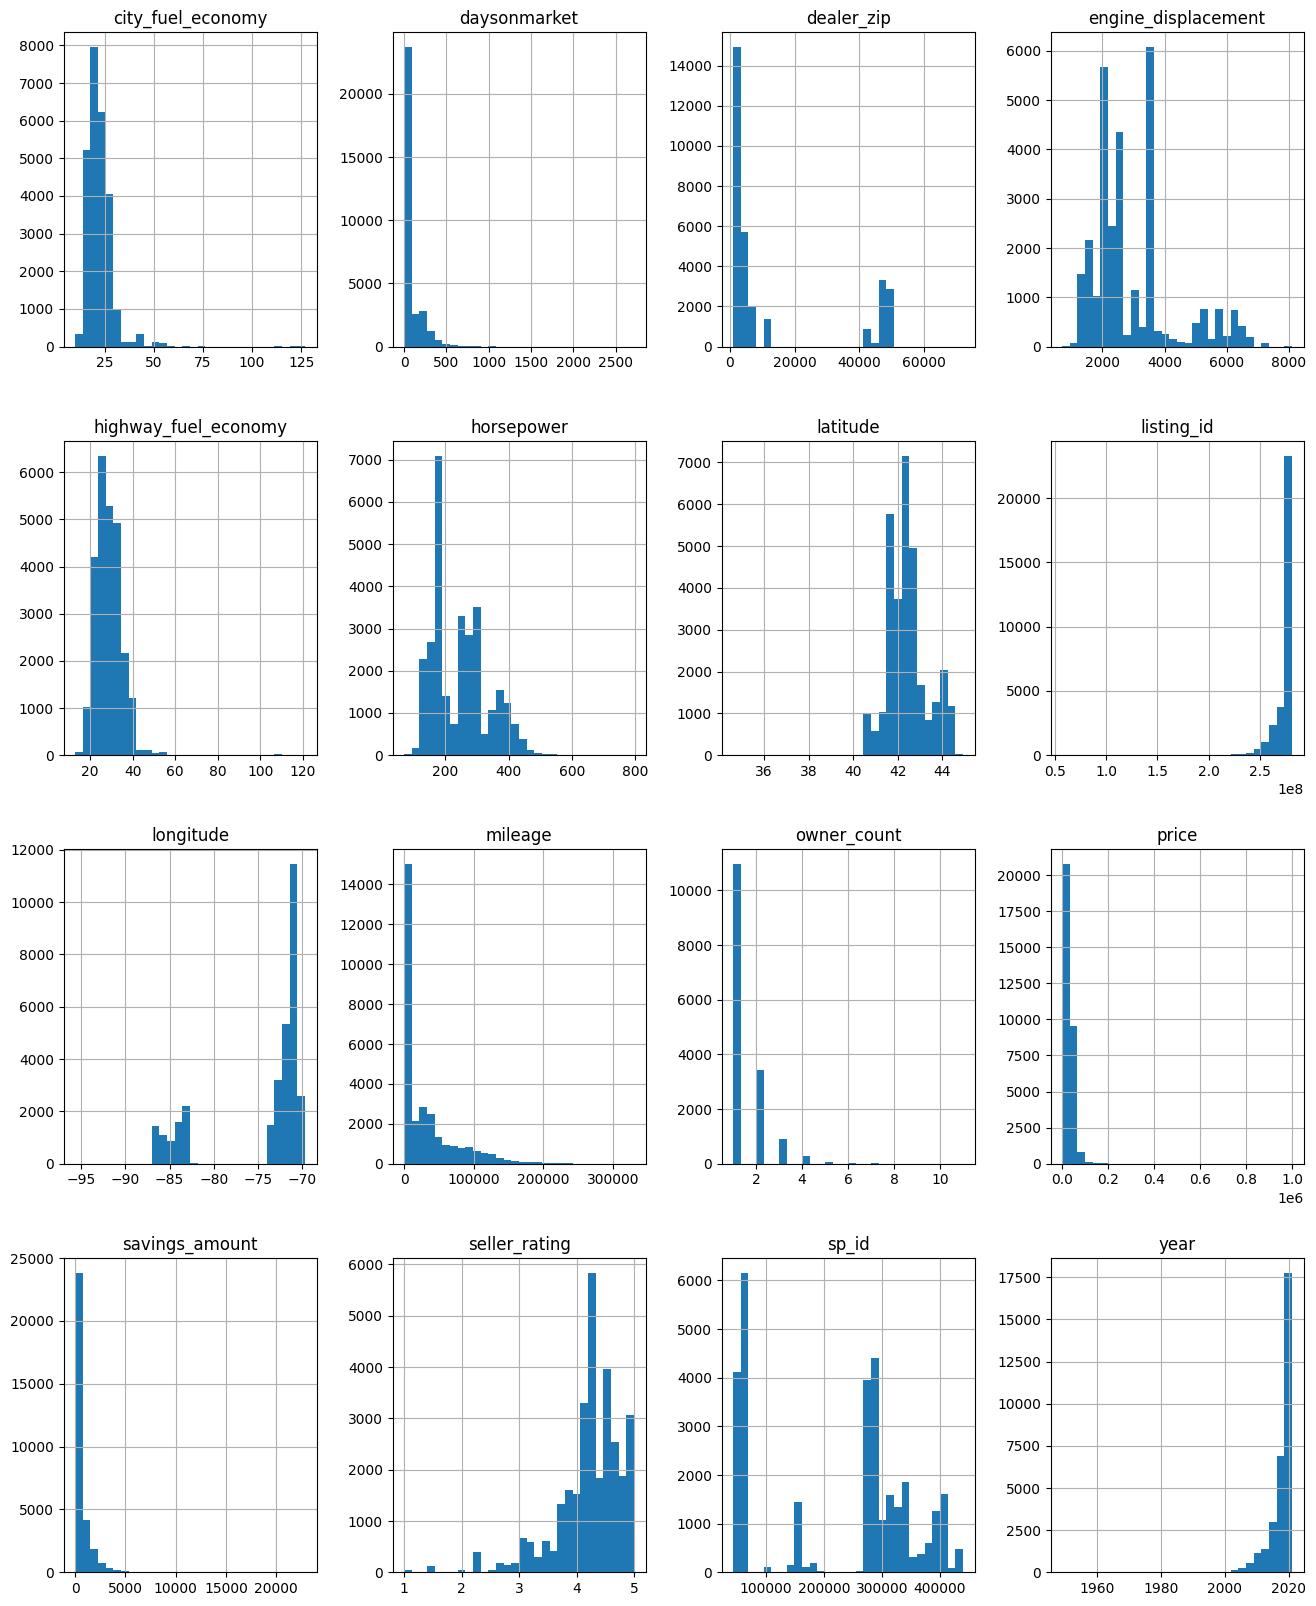

In [26]:
import matplotlib.pyplot as mpl
%matplotlib inline

df_numerical = df.select_dtypes(include=[np.int64, np.float64])
df_numerical.hist(figsize=(16,20), bins=30)
mpl.show()

Observations:


# 4. Prepare the data

Inspecting this list and using our contextual knowledge of cars, as well as the info available on the [kaggle page](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset). Certain attributes can be removed immediately, leaving ones that are believed to influence the price. Any attributes left will be further inspected before any models are used. The attributes left are given in a list below (including vin which acts as index). 

Note: data types are now defined to make sure any further exploration is done correctly.

In [48]:
# Attributes belived to influence price
desired_attributes : list = ["body_type", "city", "daysonmarket", "dealer_zip", "engine_cylinders", "engine_displacement",
                             "engine_type", "fleet", "frame_damaged", "franchise_dealer", "fuel_tank_volume", "has_accidents", "horsepower",
                            "is_new", "listed_date", "make_name", "owner_count", "power", "price",
                             "savings_amount", "seller_rating", "year", "torque"
                            ]
    
# Define datatypes of attributes to make sure any exploration is good.
data_types = {'vin' : str, 'back_legroom' : str, 'bed' : str, 'bed_height' : str,
              'bed_length' : str, 'body_type' : str, 'cabin' : str, 'city' : str,
              'city_fuel_economy' : np.float64, 'combine_fuel_economy' : np.float64,
              'daysonmarket' : np.int32, 'dealer_zip' : np.int32, 'description' : str, 
              'engine_cylinders' : str, 'engine_displacement' : np.float64,
              'engine_type' : str, 'exterior_color' : str, 'fleet' : bool, 'frame_damaged' : bool,
              'franchise_dealer' : bool, 'franchise_make' : str, 'front_legroom' : str,
              'fuel_tank_volume' : str, 'fuel_type' : str, 'has_accidents' : bool, 'height' : str,
            'highway_fuel_economy' : np.float64, 'horsepower' : np.float64, 'interior_color' : str, 'isCab' : bool,
            'is_certified' : bool, 'is_cpo' : bool, 'is_new' : bool, 'is_oemcpo' : bool, 'latitude' : np.float64, 'length' : str,
            'listed_date' : str, 'listing_color' : str, 'listing_id' : np.int32, 'longitude' : np.float64,
            'main_picture_url' : str, 'major_options' : str, 'make_name' : str, 'maximum_seating' : np.int32,
            'mileage' : np.int32, 'model_name' : str, 'owner_count' : np.int32, 'power' : str, 'price' : np.float64, 'salvage' : bool,
            'savings_amount' : np.int32 , 'seller_rating' : np.float64, 'sp_id' : np.int32, 'sp_name' : str, 'theft_title' : bool,
            'torque' : str, 'transmission' : str, 'transmission_display' : str, 'trimId' : np.int32, 'trim_name' : str,
            'vehicle_damage_category' : str, 'wheel_system' : str, 'wheel_system_display' : str,
            'wheelbase' : str, 'width' : str, 'year' : np.int32}

    
df1 = df[df.columns.intersection(desired_attributes)].convert_dtypes(data_types).copy()

Next to check if the attributes chosen have NAs. Any attributes with entries that contain an NA will be shown below.

In [50]:
df1.keys()[df1.count() != len(df1.index)]

Index(['body_type', 'engine_cylinders', 'engine_displacement', 'engine_type',
       'fleet', 'frame_damaged', 'fuel_tank_volume', 'has_accidents',
       'horsepower', 'owner_count', 'power', 'seller_rating', 'torque'],
      dtype='object')

Clearly there is issues with some attributes. Let's first inspect the numerical attributes with NA issues.

In [51]:
df1[df1.select_dtypes(include=np.int64).isnull().any(axis=1)].select_dtypes(include=np.int64).isnull().any()

daysonmarket           False
dealer_zip             False
engine_displacement     True
horsepower              True
owner_count             True
savings_amount         False
year                   False
dtype: bool

In [52]:
df1.loc[:, (df1.count() / len(df1.index)) > 0.95]

,body_type,city,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,franchise_dealer,fuel_tank_volume,horsepower,is_new,listed_date,make_name,price,savings_amount,seller_rating,year
vin,,,,,,,,,,,,,,,,,
1GCNKREC8GZ291263,Pickup Truck,Davison,48,48423,V8,5300,V8,True,26 gal,355,False,2020-07-23,Chevrolet,25797.0,143,4.222222,2016
KMHD84LF5LU062035,Sedan,Hyannis,103,2601,I4,2000,I4,True,14 gal,147,True,2020-05-29,Hyundai,21486.0,0,4.066667,2020
1FAHP3FN2BW128409,Sedan,Hyannis,18,2601,I4,2000,I4,False,13.5 gal,140,False,2020-08-22,Ford,8995.0,2314,5.0,2011
1C4RJFBG6LC386945,SUV / Crossover,Lynnfield,27,1940,V6,3600,V6,True,24.6 gal,295,True,2020-08-13,Jeep,43565.0,0,4.4375,2020
KM8J3CA43GU041610,SUV / Crossover,Hyannis,25,2601,I4,2000,I4,True,16.4 gal,164,False,2020-08-15,Hyundai,14877.0,780,4.066667,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JF2SJAGC4HH498620,SUV / Crossover,Conway,69,3818,H4,2500,H4,True,15.9 gal,170,False,2020-07-02,Subaru,20900.0,282,4.666667,2017
KM8J3CA41HU439917,SUV / Crossover,Keene,60,3431,I4,2000,I4,True,16.4 gal,164,False,2020-07-11,Hyundai,20995.0,1756,<NA>,2017
JN8AS5MV8BW660437,SUV / Crossover,Amesbury,204,1913,I4,2500,I4,False,15.9 gal,170,False,2020-02-18,Nissan,8998.0,202,5.0,2011


As most a large amount of the attributes are categorical or boolean, changing the remaining NAs to the average of the column would not make much sense. Furthermore, since the dataset is very large, removing NAs is unlikely to heavily impact the model. However to make sure the one type of car or manufactor is not being discrimanted against before they're removed the entries with NAs will be inspected.

In [53]:
car_makes_with_NA = df1[df1.isnull().any(axis=1)].make_name.unique()
df_prepared = df1[~df1.isnull().any(axis=1)]
car_makes_no_NA = df_prepared.make_name.unique()

(set(car_makes_no_NA) and set(car_makes_with_NA)) == set(car_makes_with_NA)

True

This means all car makes are being represented still even when NA rows are removed.

Now the data has been filtered, the exploration of relationships can begin. Note that only 4% of the entries have been removed.

In [54]:
round(len(df_prepared.index) / data_original_length, 2)

0.42

In [55]:
used_cars_prices = df_prepared["price"].copy()
used_cars_prices.head()

vin
1GCNKREC8GZ291263    25797.0
1FAHP3FN2BW128409     8995.0
KM8J3CA43GU041610    14877.0
2LMDU88CX8BJ22314     7995.0
1FMCU0G91HUE92298    14995.0
Name: price, dtype: Float64

In [56]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
